# Homework 6: Two-way ANOVA
***

**Name**: Alex Ma

***

This assignment is due on Gradescope by **Friday March 21 at 5:00PM**. If you submit the assignment  by this deadline, you will receive 2 bonus points. If you need a little extra time, you may submit your work by **Monday March 24 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- There is 1 total question on this assignment. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 



---

## Problem 1 (100 points)

**PART A:** Load in the data set, `MathGender.csv`

This dataset comes from: https://www.stat.cmu.edu/~hseltman/309/Book/chapter11.pdf

Here is some information about this dataset:
"The data in MathGender.csv are from an observational study carried out to investigate the relationship between the ACT Math Usage Test and the explanatory gender (1=female, 2=male) and level of mathematics coursework taken (1=algebra only, 2=algebra+geometry, 3=through calculus) for 861 high school seniors. The outcome, ACT score, ranges from 0 to 36 with a median of 15 and a mean of 15.33. An analysis of these data ... can be called a 3x2 ANOVA because those are the numbers of levels of the two categorical explanatory variables."

Perform some EDA and answer the following questions. Explicitly, I would like you to provide/answer the following:

- Change the levels for each variable from 1,2 to `female`, `male` and 1,2,3 to `algebra`, `algebra+geometry`, `calculus` respectively. The built-in `factor()` function will be helpful here.

- Create a frequency table (cross-tabulation table) that shows the number of subjects in each math/gender category. Please have the rows be the number of math classes taken and the columns be the genders given. Please note that I am using the same categories and names that the dataset provides; we are bound by the definitions of the categories as they are given.

- Boxplots for both Math and Gender categories (there should be a total of 6). 

- Is this a balanced design experiment? Or an unbalanced design experiment?

In [5]:
# Load necessary library
library(readr)

# Load the CSV file
math_gender <- read_csv("MathGender.csv")

# Display the first few rows
head(math_gender)

Rows: 861 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): score, courses, gender

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


score,courses,gender
<dbl>,<dbl>,<dbl>
5,1,2
13,1,2
7,1,2
20,1,2
11,1,2
16,1,2


In [6]:
library(dplyr)

# Convert numerical values to text labels
math_gender <- math_gender %>%
  mutate(
    gender = recode(gender, `1` = "female", `2` = "male"),
    courses = recode(courses, `1` = "algebra", `2` = "algebra+geometry", `3` = "calculus")
  )

head(math_gender)

score,courses,gender
<dbl>,<chr>,<chr>
5,algebra,male
13,algebra,male
7,algebra,male
20,algebra,male
11,algebra,male
16,algebra,male


In [7]:
# Create a cross-tabulation table
math_gender_table <- table(math_gender$courses, math_gender$gender)

# Print the table
print(math_gender_table)

                  
                   female male
  algebra              82   48
  algebra+geometry    387  223
  calculus             54   67


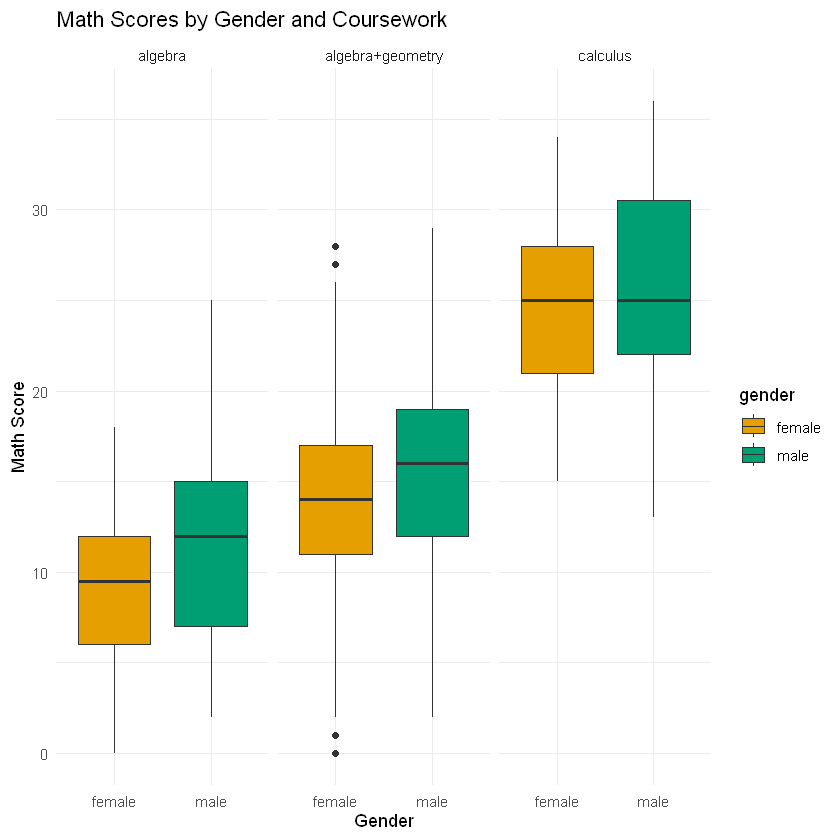

In [15]:
library(ggplot2)

# Create boxplots for Math scores by Gender and Coursework
ggplot(math_gender, aes(x = gender, y = score, fill = gender)) +
  geom_boxplot() +
  facet_wrap(~courses) +  # Creates separate plots for each coursework category
  labs(title = "Math Scores by Gender and Coursework", x = "Gender", y = "Math Score") +
  theme_minimal() +
  scale_fill_manual(values = c("female" = "#E69F00", "male" = "#009E73"))

**Answer**: This is not balanced because more females are in algebra only and algebra+geometry math level. At the same time, there're less female students in the calculus class than male.

**PART B:** 

- Make an interaction plot (aka profile plot). Specify that `courses` is the x factor and `gender` is the trace factor.

- Compute the mean and the confidence interval of the mean by groups and summarize this information in a table

- Based on the interaction plot and the confidence intervals in the table, do you think an additive model or an interaction model is the best way of proceeding? Why?

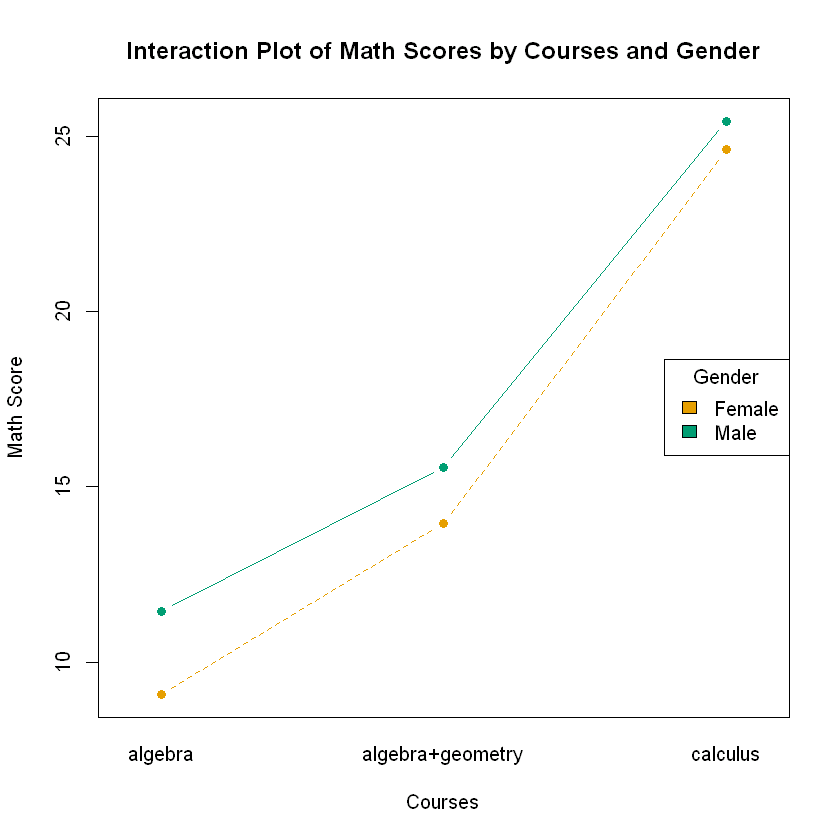

In [25]:
# Create the interaction plot
interaction.plot(x.factor = math_gender$courses, 
                 trace.factor = math_gender$gender, 
                 response = math_gender$score, 
                 type = "b",          # 'b' means both points and lines
                 pch = 19,            # Point character (solid circle)
                 col = c("#E69F00", "#009E73"),  # Colors: orange for female, green for male
                 xlab = "Courses", 
                 ylab = "Math Score", 
                 main = "Interaction Plot of Math Scores by Courses and Gender",
                 legend = FALSE)  # Remove the legend

# Manually add a legend with the title 'Gender'
legend("right", legend = c("Female", "Male"), 
       fill = c("#E69F00", "#009E73"), 
       title = "Gender")

In [27]:
# Function to compute mean and confidence interval
compute_summary <- function(data) {
  # Compute the mean
  mean_value <- mean(data$score, na.rm = TRUE)
  
  # Compute the 95% confidence interval using t.test
  ci <- t.test(data$score)$conf.int
  
  # Return a tibble with mean and confidence interval
  return(tibble(
    Mean = mean_value,
    CI_Lower = ci[1],
    CI_Upper = ci[2]
  ))
}

# Summarize by gender and courses
summary_table <- math_gender %>%
  group_by(gender, courses) %>%
  do(compute_summary(.)) %>%
  ungroup()

# Print the summary table
print(summary_table)

# A tibble: 6 × 5
  gender courses           Mean CI_Lower CI_Upper
  <chr>  <chr>            <dbl>    <dbl>    <dbl>
1 female algebra           9.07     8.15     9.99
2 female algebra+geometry 14.0     13.5     14.5 
3 female calculus         24.6     23.3     26.0 
4 male   algebra          11.5      9.98    12.9 
5 male   algebra+geometry 15.6     14.9     16.2 
6 male   calculus         25.4     24.1     26.8 


**Answer**: we should use an interactive model because the first two means of female groups (algebra only and algebra+geometry) lie outside of the CI of the mean of the first two male groups. 

**PART C:** Perform a two-way ANOVA with interaction on the dataset. Please use the `aov()` function to do this and print out the ANOVA table (this is the table with the various sums of squares, degrees of freedom, F-statistics, and p-values).

- What are the three hypotheses that we should test with this table?

- Based on the ANOVA results, what are the conclusions of each of these three hypothesis tests?

In [29]:
# Perform two-way ANOVA with interaction between gender and courses
anova_model <- aov(score ~ gender * courses, data = math_gender)

# Print the ANOVA table
summary(anova_model)

                Df Sum Sq Mean Sq F value   Pr(>F)    
gender           1   1431    1431  58.586 5.25e-14 ***
courses          2  14705    7352 301.112  < 2e-16 ***
gender:courses   2     38      19   0.771    0.463    
Residuals      855  20877      24                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**Answer**

1. Effects of Gender:
    - Null Hypothesis ($H_0$): different genders contributed to a real difference in the math scores. 
    - Alternative Hypothesis ($H_1$): different genders didn't contribute to a real difference in the math scores.

**Conclusion:** because `p-value = 5.25e-14`, we reject the null hypothesis and conclude that gender has a significant contribution to math scores. 

2. Effects of Math Course Levels:
    - Null Hypothesis ($H_0$): different math course level taken contributed to a real difference in the math scores. 
    - Alternative Hypothesis ($H_1$): different math course level taken didn't contribute to a real difference in the math scores.

**Conclusion:** because `p-value < 2e-16`, we reject the null hypothesis and conclude that math course level has a significant contribution to math scores. 

3. Interaction Effect Between Gender and Math Course Levels:
    - Null Hypothesis ($H_0$): There is no significant interaction effect between gender and math course level taken on the math scores.
    - Alternative Hypothesis ($H_1$): There is a significant interaction effect between gender and math course level taken on the math scores.

**Conclusion:** because `p-value < 0.463`, we reject the null hypothesis and conclude that the interaction effect between gender and math course level don't have a significant contribution to math scores. 

**PART D:** Remove the interaction and re-do the two-way ANOVA. Print out the ANOVA table again as you did in Part C. 

- What is different in this additive (non-interaction) model? 

In [31]:
# Perform two-way ANOVA without the interaction term
anova_model_no_interaction <- aov(score ~ gender + courses, data = math_gender)

# Print the ANOVA table
summary(anova_model_no_interaction)

             Df Sum Sq Mean Sq F value   Pr(>F)    
gender        1   1431    1431   58.62 5.16e-14 ***
courses       2  14705    7352  301.27  < 2e-16 ***
Residuals   857  20914      24                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**Answer**

There might be no statistical difference between the two models in terms of their conclusions regarding the significance of the factors. However, the interpretation of the effect significance might be different.

In the interaction model, the main effects of gender and courses are interpreted conditionally, meaning they are influenced by the interaction between the two factors. In other words, the effect of gender on math_score depends on the level of courses, and vice versa.

In the main effects-only model, the interpretation of gender and courses is independent, meaning each factor is assumed to have a uniform effect on math scores, regardless of the other factor.

**PART E:** Use diagnostic tools to determine whether the error in the interaction model satisfies the constant variance assumption and the normality assumption. Justify your findings with both a plot and a formal test.

In [32]:
anova_model_interaction <- aov(score ~ gender * courses, data = math_gender)
residuals <- residuals(anova_model_interaction)

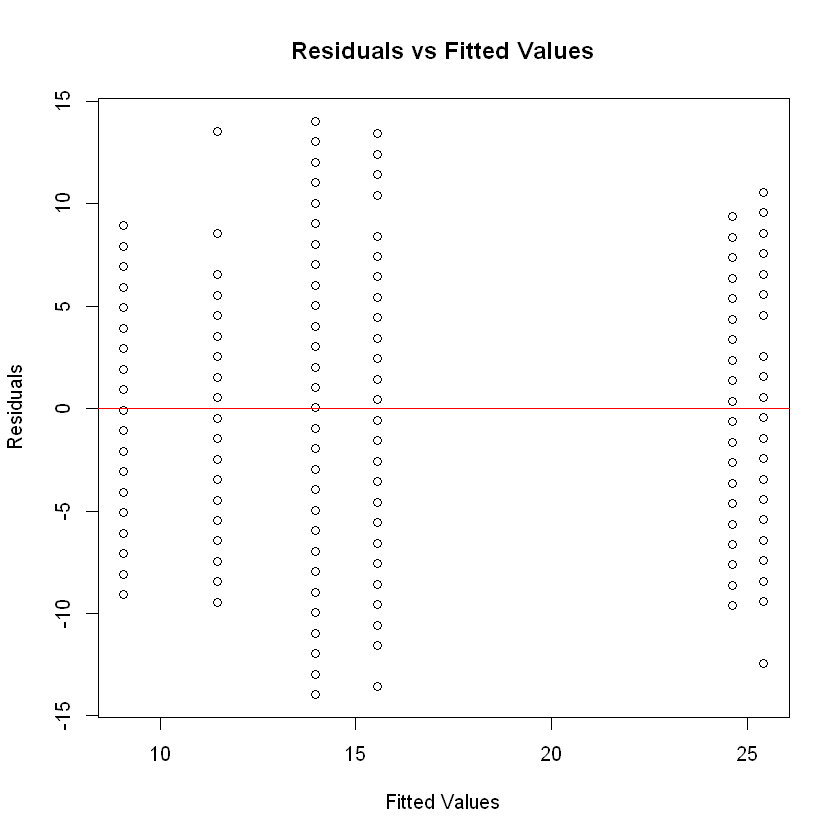

In [33]:
plot(fitted(anova_model_interaction), residuals, 
     main = "Residuals vs Fitted Values", 
     xlab = "Fitted Values", 
     ylab = "Residuals")
abline(h = 0, col = "red")

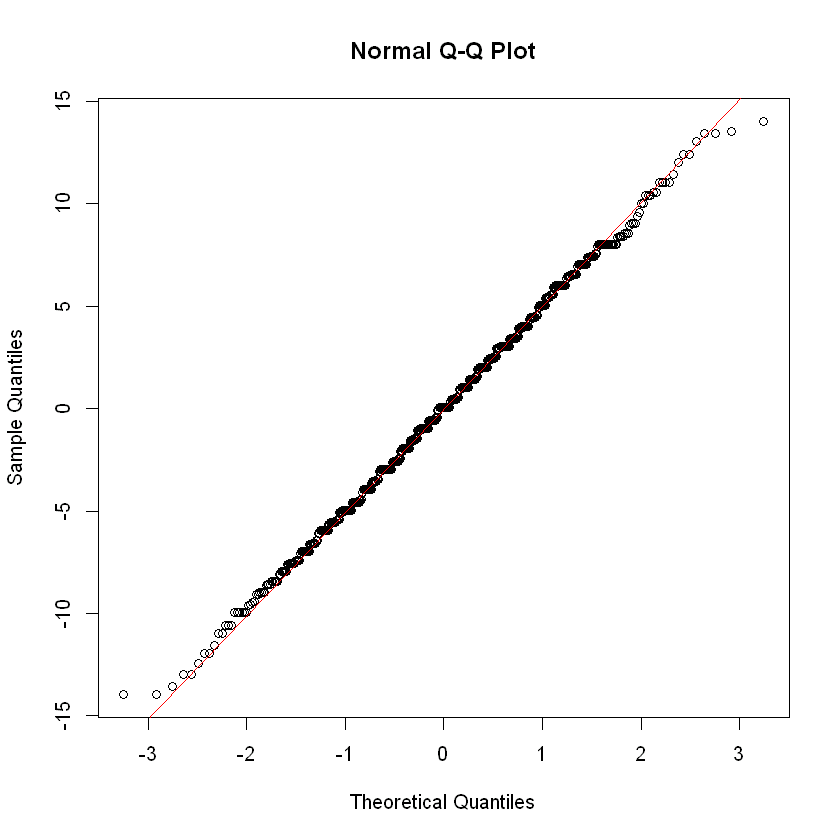

In [34]:
qqnorm(residuals)
qqline(residuals, col = "red")

**Answer**

The interaction model satisfied the normality of residual assumption (according to the Q-Q plot) but not constant variance assumption, because in the residual scatter plot scores around 20 are missing from the graph.